# **TP1 - Sistemas de Inteligencia Artificial**
# **Integrantes**:
Julia Sexe (65669)

Sofia Alfie (64244)

Isidro Perasso (65595)

Tobias Tardá (65730)
## Regresión con Modelos Lineales
#### Dataset: Properati Bs. As. 2020 ([Kaggle](https://www.kaggle.com/datasets/alejandromendivil/bsas-realstate-on-sale/))

 **Trabajaremos con modelos lineales**

Son aquellos que tienen la forma:

$\hat{y} =\theta_0 +\theta_1 x_1 + \theta_2 x_2 + .. +\theta_n x_n$

o, vectorialmente

$\hat{y} = \vec{\theta} \cdot \vec{x}$

donde $\hat{y}$ es la predicción,
$n$ es el número de _features_ o variables predictoras, $x_i$ es el i-ésimo feature y $\vec{\theta}$ es el vector de parámetros o _pesos_ del modelo (lo que entrenamos).

**Modelos lineales regularizados**

En los modelos lineales simples, los parámetros $\theta_i$ se ajustan minimizando el error cuadrático medio entre las predicciones y los valores reales. Sin embargo, cuando hay **muchas variables**, correlaciones fuertes entre ellas o riesgo de *overfitting*, se utilizan **términos de regularización** que penalizan la magnitud de los coeficientes, mejorando así la capacidad de generalización del modelo.

Algunos ejemplos:

- **Ridge Regression** (*L2 regularization*):  

  $\text{Loss} = \text{MSE} + \alpha \sum_{i=1}^n \theta_i^2$

  Tiende a mantener todos los coeficientes pequeños pero distintos de cero.

- **Lasso Regression** (*L1 regularization*):  

  $\text{Loss} = \text{MSE} + \alpha \sum_{i=1}^n |\theta_i|$

  Puede forzar coeficientes exactamente a cero, funcionando también como método de selección de variables.

- **Elastic Net**: combina L1 y L2, balanceando sus ventajas.


**Modelos lineales con *features* polinomiales**

Los modelos lineales pueden extenderse para capturar relaciones **no lineales** entre las variables de entrada y la variable objetivo mediante la creación de nuevas variables que son **combinaciones polinomiales** de las originales.

Por ejemplo, con dos variables $x_1$ y $x_2$ y un polinomio de grado 2, el modelo considera:  
$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2
$  

Aunque la relación entre las *features* y $\hat{y}$ puede ser no lineal, el modelo sigue siendo **lineal en los parámetros** $\theta_i$, por lo que conserva las propiedades y métodos de ajuste de los modelos lineales clásicos.

Este enfoque, combinado con regularización, permite capturar patrones complejos sin perder el control sobre el sobreajuste.


------------------------
------------------------
**Instrucciones:**

- **No** modificar las celdas de texto.

- Resolver cada consigna en su sección correspondiente. Pueden sumar celdas de código y texto si lo consideran necesario. Recuerden que lo más importante es el razonamiento y justificación de los pasos para demostrar comprensión del problema a resolver.

- **ENTREGA:** Ir a Archivo > Descargar .ipynb. Este archivo .ipynb deberán subirlo al campus junto con las diapositivas en formato PDF (archivo no editable) hasta las 23:59hs del día anterior a la presentación. La presentación oral de este último documento será de manera grupal en hasta 10 minutos el día 10/09 durante el horario de clase (se sorteará el orden de los grupos al azar). Dado el tiempo de exposición, recomendamos un máximo de 5 diapositivas.

------------------------
------------------------

# 1. Importar librerías

In [ ]:
# las librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Definir el problema

- **¿Cuál es la tarea que queremos hacer con aprendizaje automático?**
  - Predecir el precio de las propiedades.
- **¿Qué métrica de evaluación vamos a usar?**
  - Utilizaremos el RMSE (_root mean squared error_).


# 3. Cargar los datos

In [ ]:
# Cargamos el dataset de Kaggle
import kagglehub
import os

path = kagglehub.dataset_download("alejandromendivil/bsas-realstate-on-sale")
csv_file_path = os.path.join(path, 'bsas_realstate_on_sale_properati_dataset_2020.csv')

df = pd.read_csv(csv_file_path) # lo guardamos en un DataFrame de pandas

Using Colab cache for faster access to the 'bsas-realstate-on-sale' dataset.


# 4.  Análisis exploratorio de datos

Acá comienzan ustedes..
- 4.1) **Conocer los datos**
  - Explorar la estructura del dataset: cantidad de columnas y filas, tipos de datos, entender qué significa cada variable (métodos relevantes: `head()`, `info()`, `describe()`).

- 4.2) **Valores faltantes**
  - Calcular el porcentaje de valores nulos por columna.
  - Decidir si se imputan, se eliminan o se dejan según la estrategia de preprocesamiento.

- 4.3) **Distribuciones de variables y valores atípicos**
  - Graficar histogramas, boxplots o violinplots para variables numéricas.
  - Identificar valores atípicos y limpiarlos de ser necesario.
  - Graficar conteos para variables categóricas (sug: `value_counts()` o `sns.countplot()`).

- 4.4) **Relaciones entre variables**
  - Graficar diagramas de dispersión entre variables relevantes y el precio (sug: `scatterplot()`, `sns.pairplot()`).
  - Calcular matriz de correlación y visualizar (sug: `imshow` o `sns.heatmap()`).

In [ ]:
## 4.1)

# Vista inicial de los datos
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
## 4.1)

# Vista final de los datos
df.tail()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


In [ ]:
## 4.1)

# Info general: tipos de datos, nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [ ]:
## 4.1)
df.start_date = pd.to_datetime(df['start_date'])

In [ ]:
## 4.1)

print("Cantidad de filas: ", df.shape[0], "\nCantidad de columnas: ", df.shape[1])

Cantidad de filas:  146660 
Cantidad de columnas:  19


In [ ]:
## 4.1)

# Nombres de columnas
print(df.columns.tolist())

['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [ ]:
## 4.1)

# Estadísticas descriptivas de columnas numéricas
df.describe()

# Observo los valores únicos de las variables de texto

for col in df.select_dtypes(include="object").columns:
    if col not in ['end_date', 'start_date','created_on']: # sin incluir las fechas
        print(f"\nColumna: {col}")
        print(df[col].unique())


Columna: l1
['Argentina']

Columna: l2
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']

Columna: l3
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora'

In [ ]:
## 4.2)

# Cantidad de valores nulos en cada columna
df.isnull().sum()

,0
start_date,0
end_date,0
created_on,0
lat,9925
lon,9959
l1,0
l2,0
l3,0
rooms,0
bedrooms,0


In [ ]:
## 4.2)

# Porcentaje de valores nulos por columna
nulos_porcentaje = df.isnull().mean() * 100 # se utiliza .mean() porque calcula la media de cada columna (True es 1 y False es 0), que es la proporción de valor nulos en esa columna.
print("Porcentaje de valores nulos por columna:\n", round(nulos_porcentaje.sort_values(ascending=False),2),sep='')

# Vemos que el porcentaje de valores nulos es salvable.
# Creemos que 15% todavia es una cantidad que se puede imputar sin sesgar la muestra demasiado

Porcentaje de valores nulos por columna:
surface_covered    14.74
surface_total      14.00
lon                 6.79
lat                 6.77
bathrooms           4.06
start_date          0.00
end_date            0.00
created_on          0.00
l3                  0.00
l2                  0.00
l1                  0.00
bedrooms            0.00
rooms               0.00
price               0.00
currency            0.00
title               0.00
description         0.00
property_type       0.00
operation_type      0.00
dtype: float64


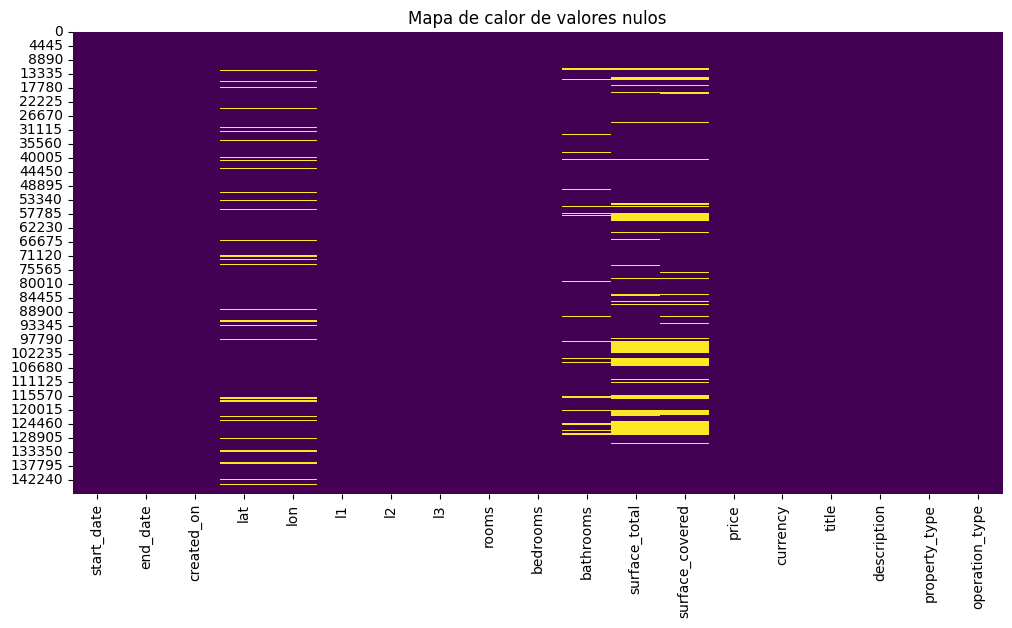

In [ ]:
## 4.2)

# Visualización de valores nulos

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores nulos")
plt.show()

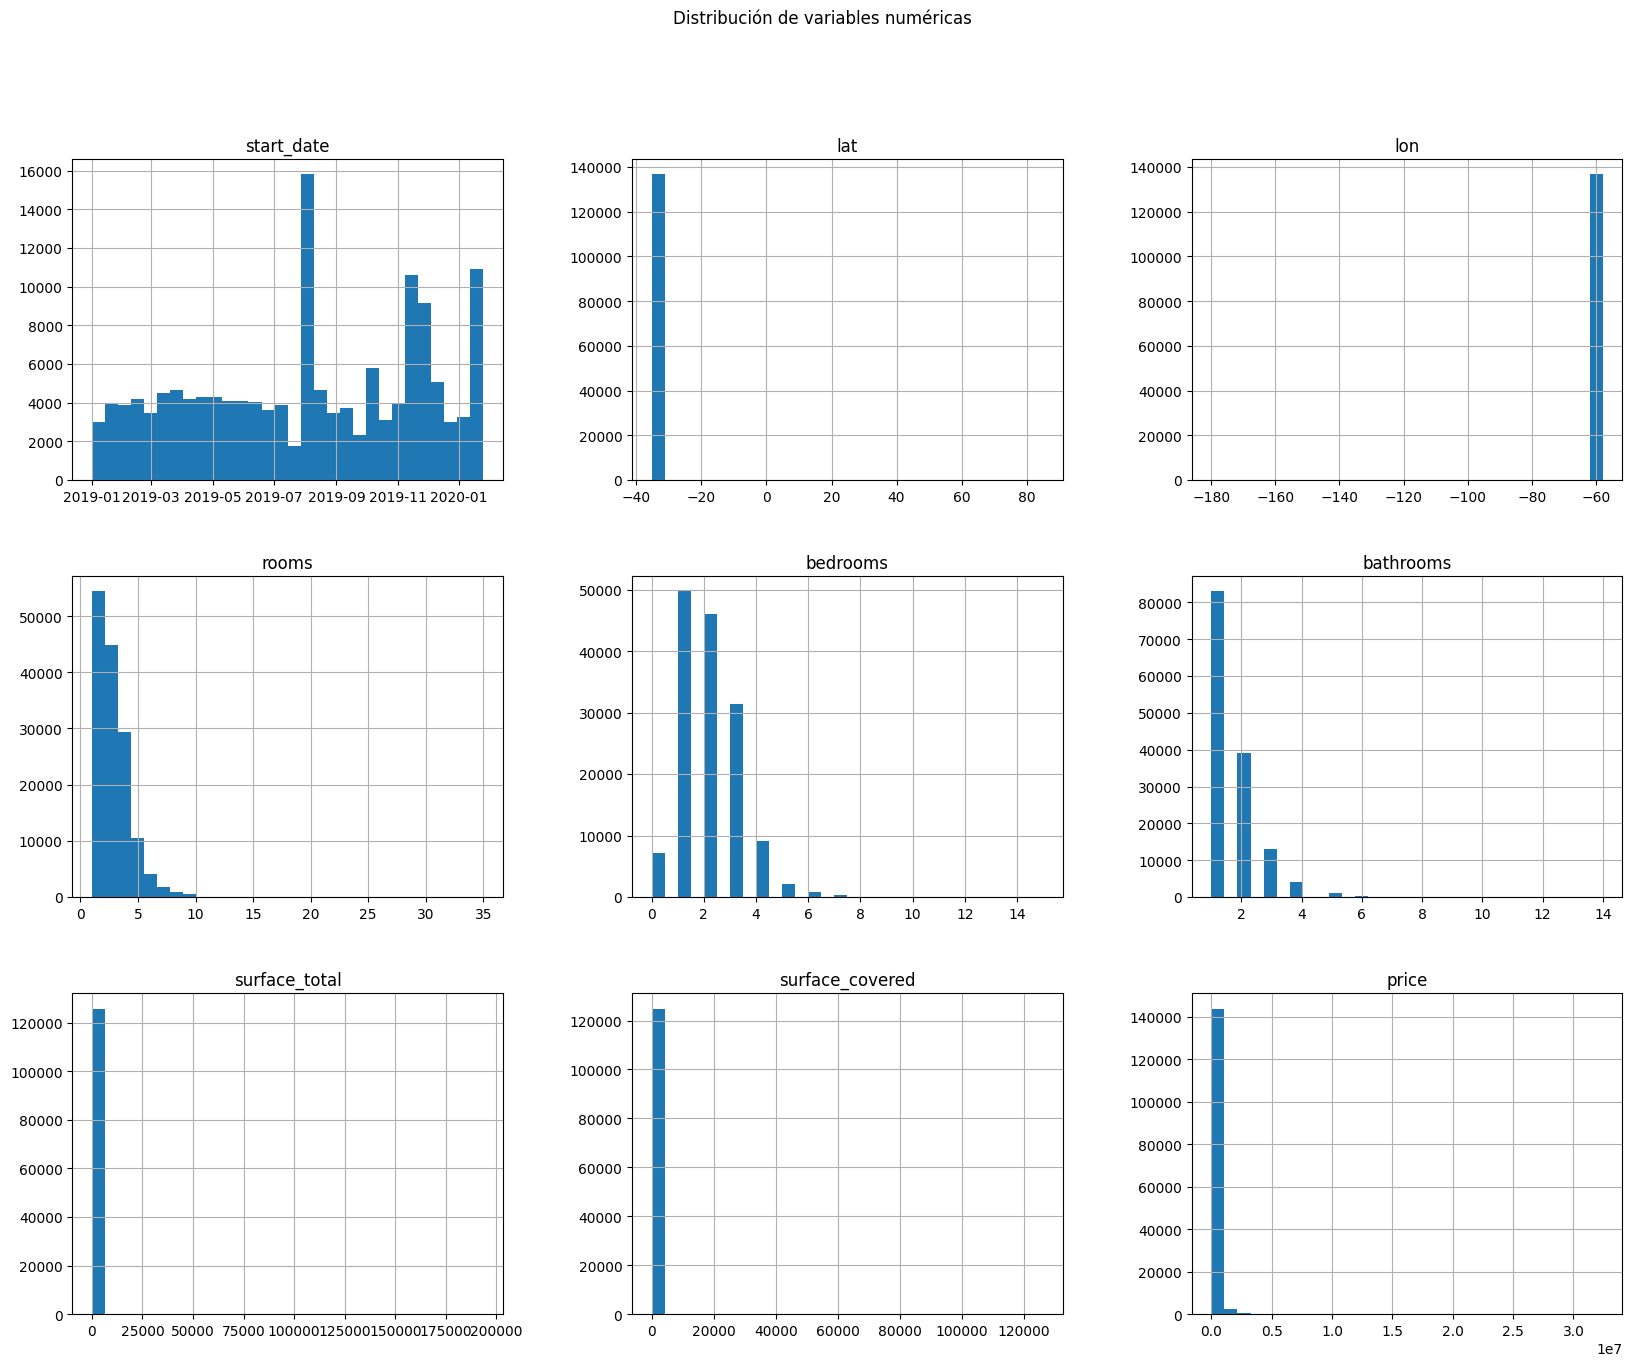

In [ ]:
## 4.3)

# Histograma de variables numéricas
df.hist(bins=30, figsize=(20,15))
plt.suptitle("Distribución de variables numéricas")
plt.show()

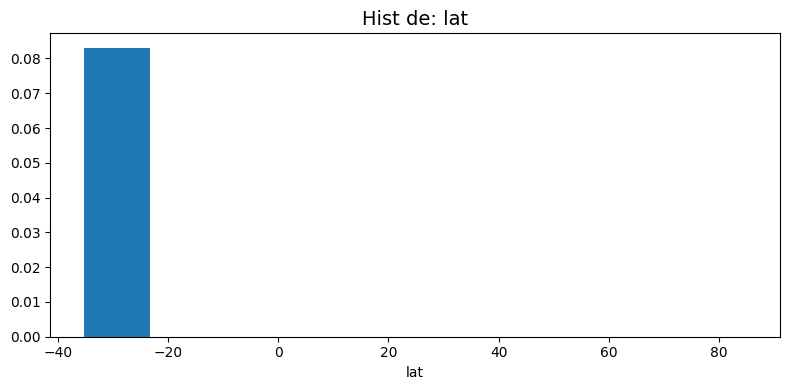

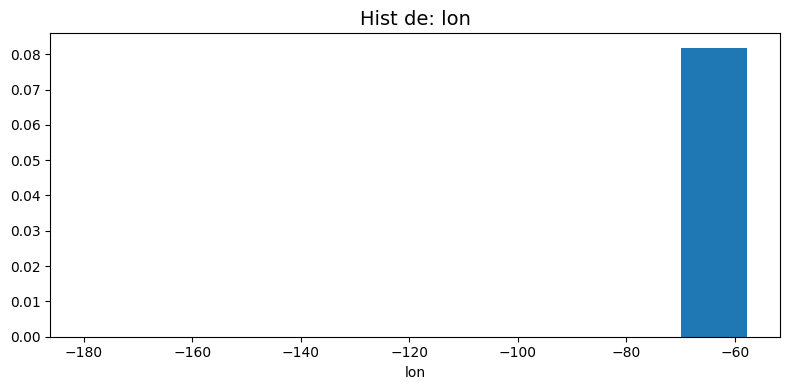

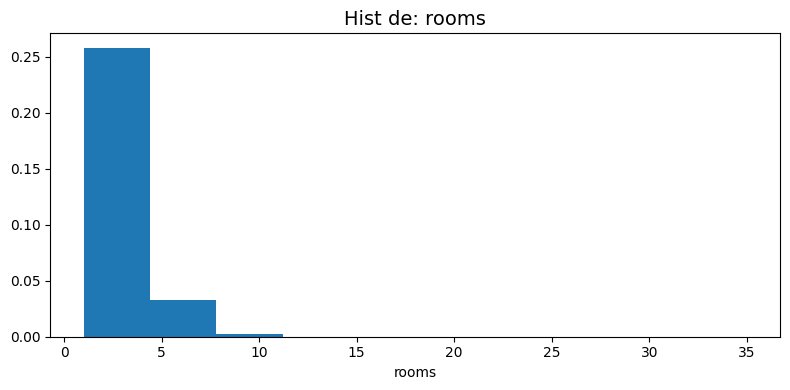

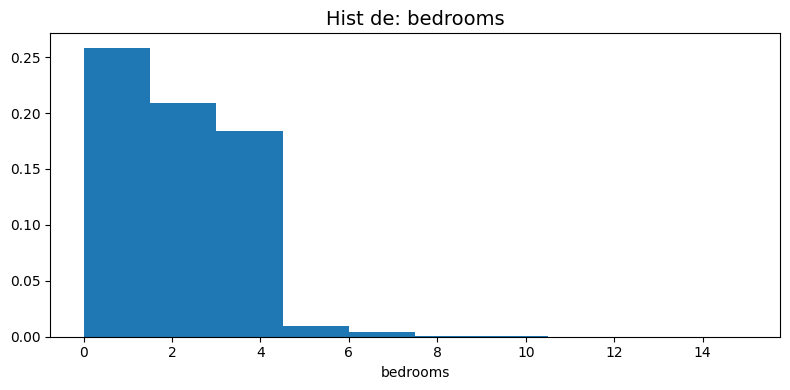

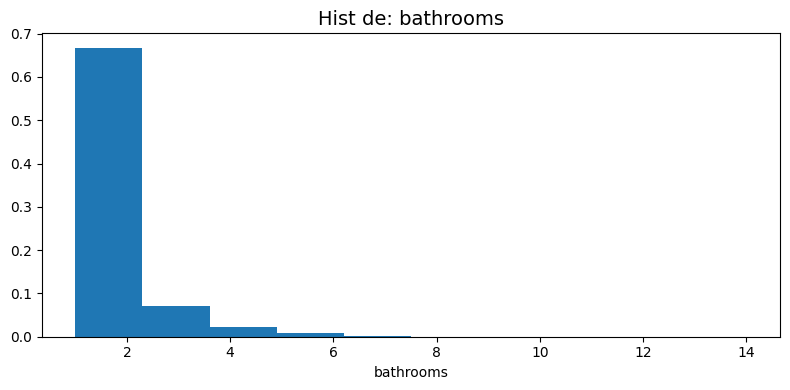

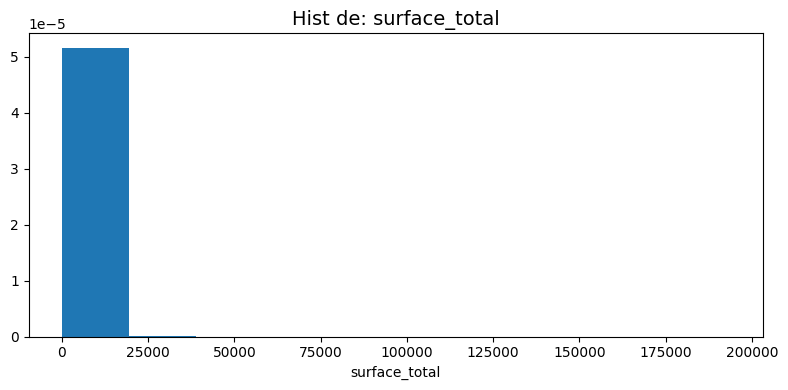

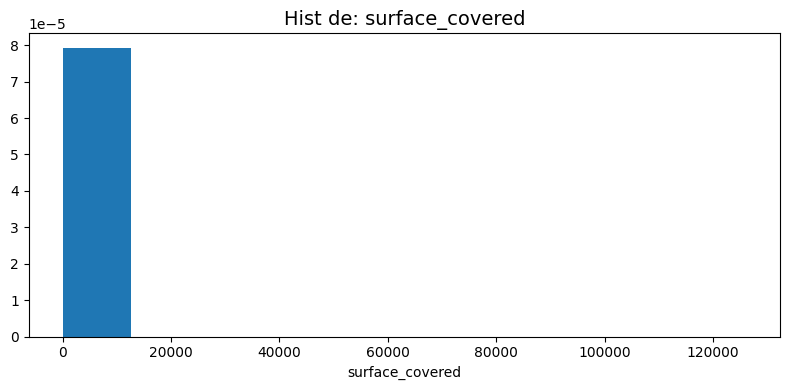

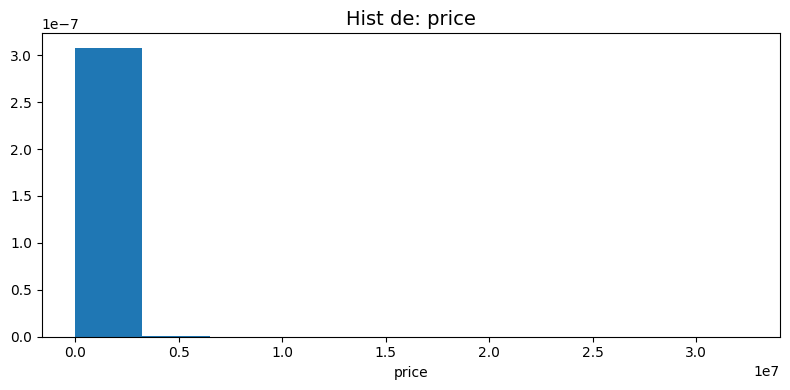

In [ ]:
## 4.3)
cols_numericas = df.select_dtypes(include='number').columns

# Histograma de cada columna, pero separado para mayor claridad
for col in cols_numericas:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], density=True)
    plt.title(f"Hist de: {col}", fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Bedrooms parece una muy buena variable predictora

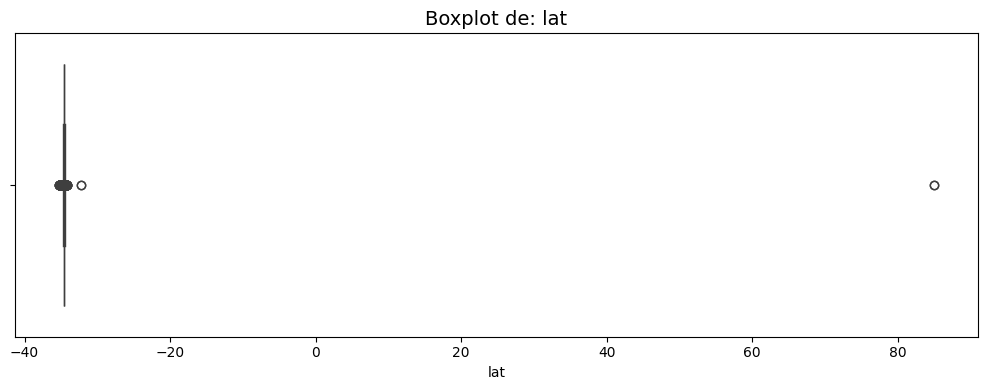

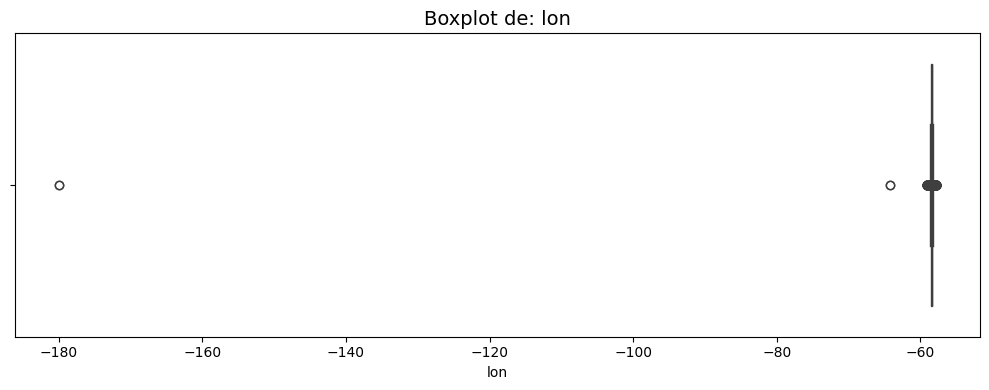

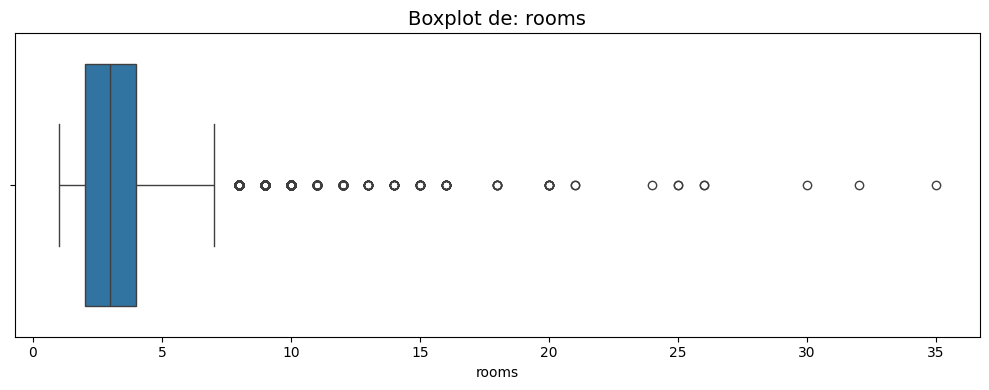

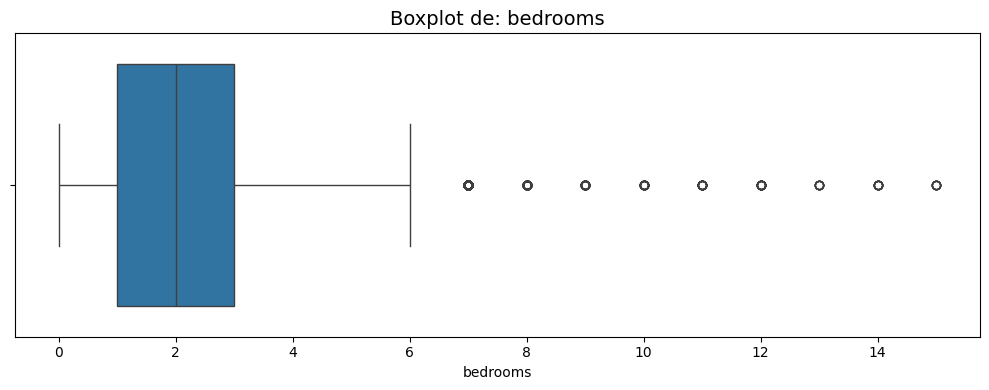

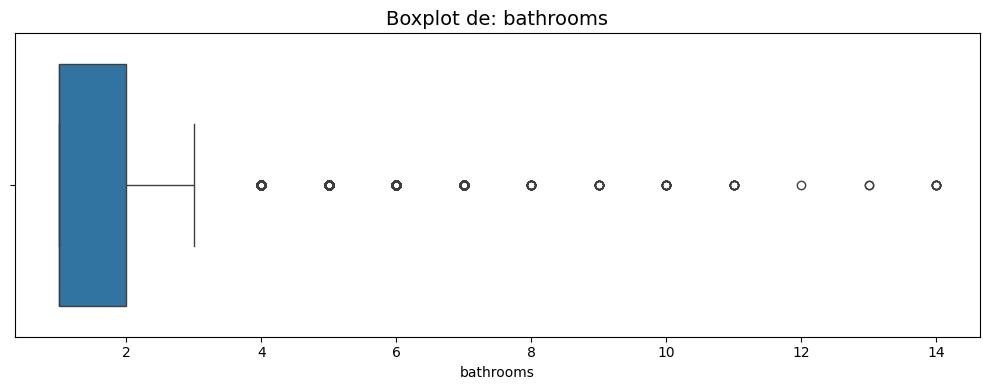

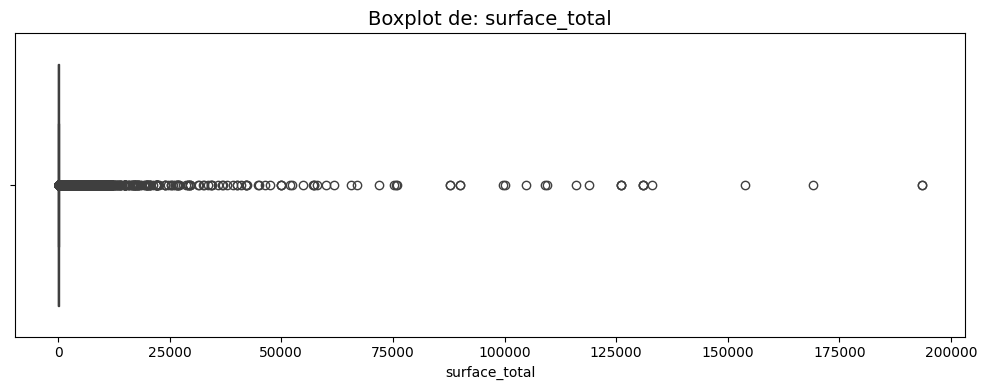

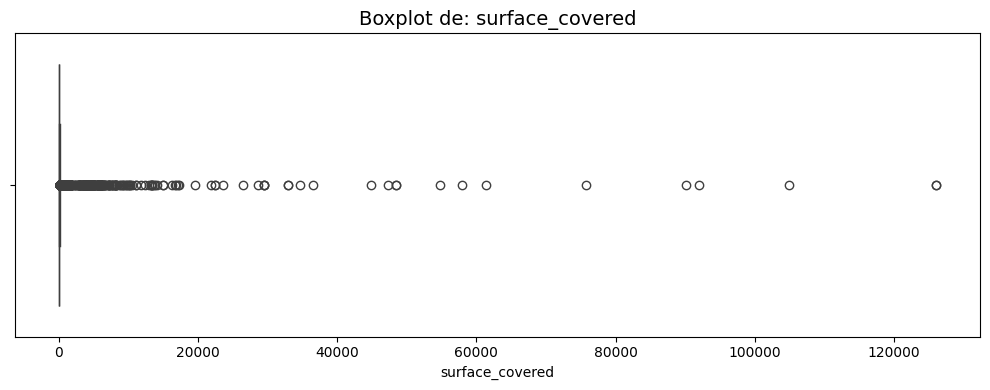

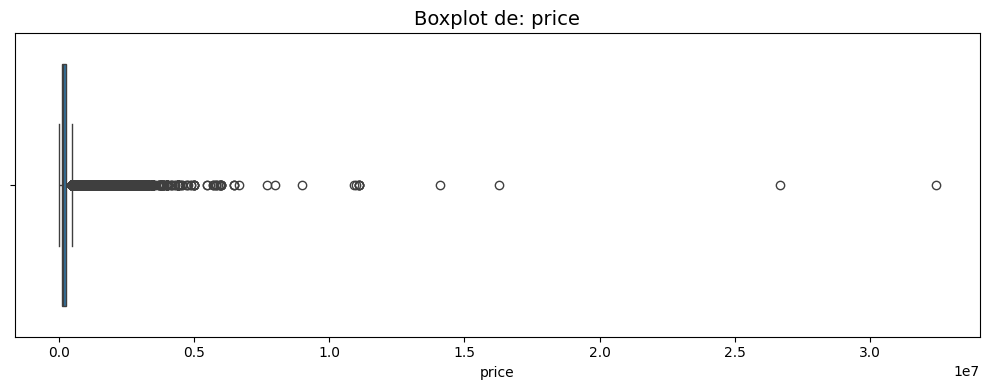

In [ ]:
## 4.3)

# Boxplots para detectar outliers y ver la distribucion de las variables
cols_numericas = df.select_dtypes(include='number').columns

for col in cols_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de: {col}", fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Observamos que hay muchos outliers. Las variables numericas discretas son las que tienen los boxplots mas "normales"
# Cuidado: Tiene sentido que por la cantidad de valores faltantes esto se vea alterado. Despues deberiamos repetirlo

In [ ]:
## 4.3)

cols_numericas = df.select_dtypes(include='number').columns

# Función para detectar outliers usando IQR
def detectar_outliers_iqr(df, columna, severos = False):
    if severos == True:
      sep = 3
    else:
      sep = 1.5
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - sep * IQR
    limite_superior = Q3 + sep * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]      # ***
    return outliers.index

# ***: un detalle. Elegimos imputar valores faltantes mas adelante porque si imputamos antes vamos a estar sesgando mas la muestra, incluso quiza imputando un valor faltante por un outlier

qOutliers = 0
qOutliersSeveros = 0
for col in cols_numericas:
    outliers = detectar_outliers_iqr(df, col)
    outliers_severos = detectar_outliers_iqr(df, col, severos=True)
    print(f"{col}: {len(outliers)} outliers totales ({len(outliers) / len(df) * 100:.2f}%)",
          f" y {len(outliers_severos)} outliers severos ({len(outliers_severos) / len(df) * 100:.2f}%)",sep='')
    qOutliers+= len(outliers)
    qOutliersSeveros+= len(outliers_severos)
    outliers_severos = pd.Series(outliers_severos.tolist())
    df_outliers_severos = pd.concat([df_outliers_severos,outliers_severos])

print(f'En total hay {qOutliers} outliers y {qOutliersSeveros} outliers severos')

# Bedrooms, bathrooms y rooms son variables con poco outliers, buenas para predecir

lat: 27867 outliers totales (19.00%) y 12155 outliers severos (8.29%)
lon: 17255 outliers totales (11.77%) y 8003 outliers severos (5.46%)
rooms: 1447 outliers totales (0.99%) y 176 outliers severos (0.12%)
bedrooms: 428 outliers totales (0.29%) y 73 outliers severos (0.05%)
bathrooms: 5595 outliers totales (3.81%) y 479 outliers severos (0.33%)
surface_total: 13452 outliers totales (9.17%) y 7397 outliers severos (5.04%)
surface_covered: 10124 outliers totales (6.90%) y 3878 outliers severos (2.64%)
price: 10982 outliers totales (7.49%) y 5527 outliers severos (3.77%)
En total hay 87150 outliers y 37688 outliers severos


In [ ]:
## 4.3)
print(f'Entonces detectamos {qOutliersSeveros} outliers severos y en nuestro df de indices de outliers severos tenemos {len(df_outliers_severos)} filas')
print(f'Nos quedamos con {df_outliers_severos[0].nunique()} filas distintas que tienen outliers severos')
df_outliers_severos = df_outliers_severos.drop_duplicates()
print(df_outliers_severos.shape)

Entonces detectamos 37688 outliers severos y en nuestro df de indices de outliers severos tenemos 37688 filas
Nos quedamos con 24222 filas distintas que tienen outliers severos
(24222, 1)


In [ ]:
long1 = len(df)
print(f'Antes de hacer lo cambios tenemos {long1} filas')

Antes de hacer lo cambios tenemos 146660 filas


In [ ]:
# Sacamos los outliers
indices = df_outliers_severos.values.ravel()
df = df.loc[~df.index.isin(indices)]

In [ ]:
print(f'Despues de hacer los cambios tenemos {len(df)} filas, o sea una diferencia de {long1-len(df)} registros')

Despues de hacer los cambios tenemos 122438 filas, o sea una diferencia de 24222 registros


In [ ]:
## 4.3)

cols_pos_categoricas = df.select_dtypes(include='object').columns

# Cantidad de valores únicos por variable categórica
print("Cantidad de valores únicos por variable posible categórica:\n")
for col in cols_pos_categoricas:
    n_unicos = df[col].nunique()
    print(f"{col}: {n_unicos} valores únicos")

# 'l2', 'l3' y 'property_type' pueden ser categóricas

Cantidad de valores únicos por variable posible categórica:

end_date: 411 valores únicos
created_on: 365 valores únicos
l1: 1 valores únicos
l2: 4 valores únicos
l3: 89 valores únicos
currency: 1 valores únicos
title: 62507 valores únicos
description: 86363 valores únicos
property_type: 10 valores únicos
operation_type: 1 valores únicos


In [ ]:
## 4.3)
# Tampoco nos sirve el año
df.start_date.dt.year.value_counts()

,count
start_date,
2019,110367
2020,12071


In [ ]:
## 4.3)

# Graficar conteos para variables categóricas

print(df["l2"].value_counts())
print('\n')
print(df["l3"].value_counts())
print('\n')
print(df["property_type"].value_counts())

l2
Capital Federal             87331
Bs.As. G.B.A. Zona Norte    15633
Bs.As. G.B.A. Zona Oeste    10817
Bs.As. G.B.A. Zona Sur       8657
Name: count, dtype: int64


l3
Palermo              11851
Almagro               7472
Caballito             6481
Villa Crespo          6457
Belgrano              6230
                     ...  
Florencio Varela        11
Catalinas                5
General Rodríguez        4
Marcos Paz               2
Cañuelas                 2
Name: count, Length: 89, dtype: int64


property_type
Departamento       96053
PH                 13459
Casa               11030
Oficina              601
Lote                 491
Cochera              237
Local comercial      224
Depósito             159
Otro                 148
Casa de campo         36
Name: count, dtype: int64


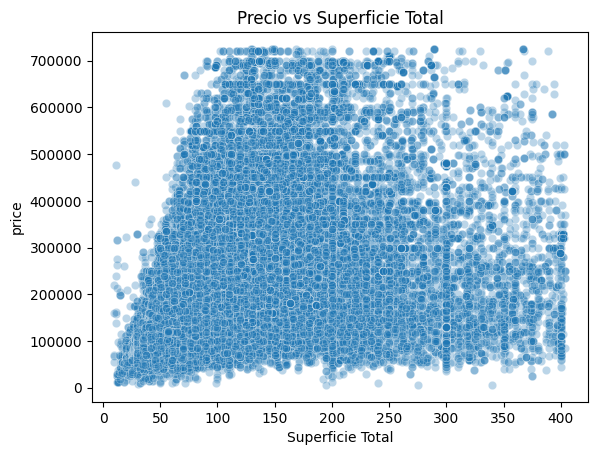

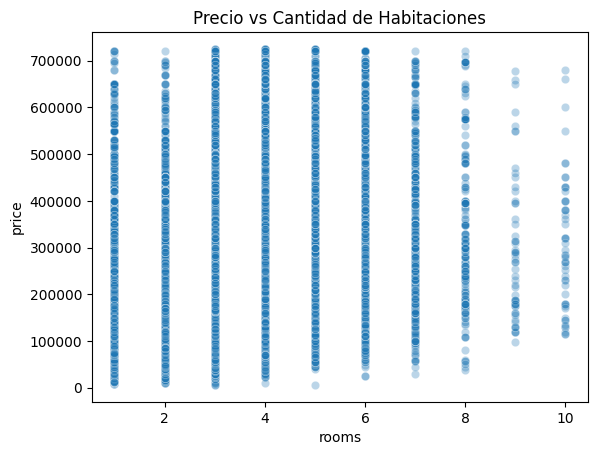

In [ ]:
## 4.4)

#Diagramas de dispersión
price_col = "price_usd" if "prince_usd" in df.columns else "price"

def prep_xy(xcol, ycol):
    tmp = df[[xcol, ycol]].copy()
    tmp[xcol] = pd.to_numeric(tmp[xcol], errors="coerce")
    tmp[ycol] = pd.to_numeric(tmp[ycol], errors="coerce")
    return tmp.dropna()

tmp = prep_xy("surface_total", price_col)
sns.scatterplot(data=df, x="surface_total", y=price_col, alpha=0.3)
plt.title("Precio vs Superficie Total")
plt.xlabel("Superficie Total")
plt.ylabel(price_col)
plt.show()

tmp = prep_xy("rooms", price_col)
sns.scatterplot(data=df, x="rooms", y=price_col, alpha=0.3)
plt.title("Precio vs Cantidad de Habitaciones")
plt.xlabel("rooms")
plt.ylabel(price_col)
plt.show()

# No parece haber relaciones evidentes, aunque para inmuebles de mas habitaciones parece que el piso de precio es mayor

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.402692,-0.048791,0.032470,0.053512,-0.067347,-0.042266,0.166104
lon,-0.402692,1.000000,-0.012911,-0.028980,0.002904,-0.141480,-0.035299,0.129429
rooms,-0.048791,-0.012911,1.000000,0.896878,0.566300,0.680392,0.781236,0.529415
bedrooms,0.032470,-0.028980,0.896878,1.000000,0.543448,0.661609,0.764522,0.498637
bathrooms,0.053512,0.002904,0.566300,0.543448,1.000000,0.500910,0.617356,0.640570
surface_total,-0.067347,-0.141480,0.680392,0.661609,0.500910,1.000000,0.858778,0.498940
surface_covered,-0.042266,-0.035299,0.781236,0.764522,0.617356,0.858778,1.000000,0.637980
price,0.166104,0.129429,0.529415,0.498637,0.640570,0.498940,0.637980,1.000000


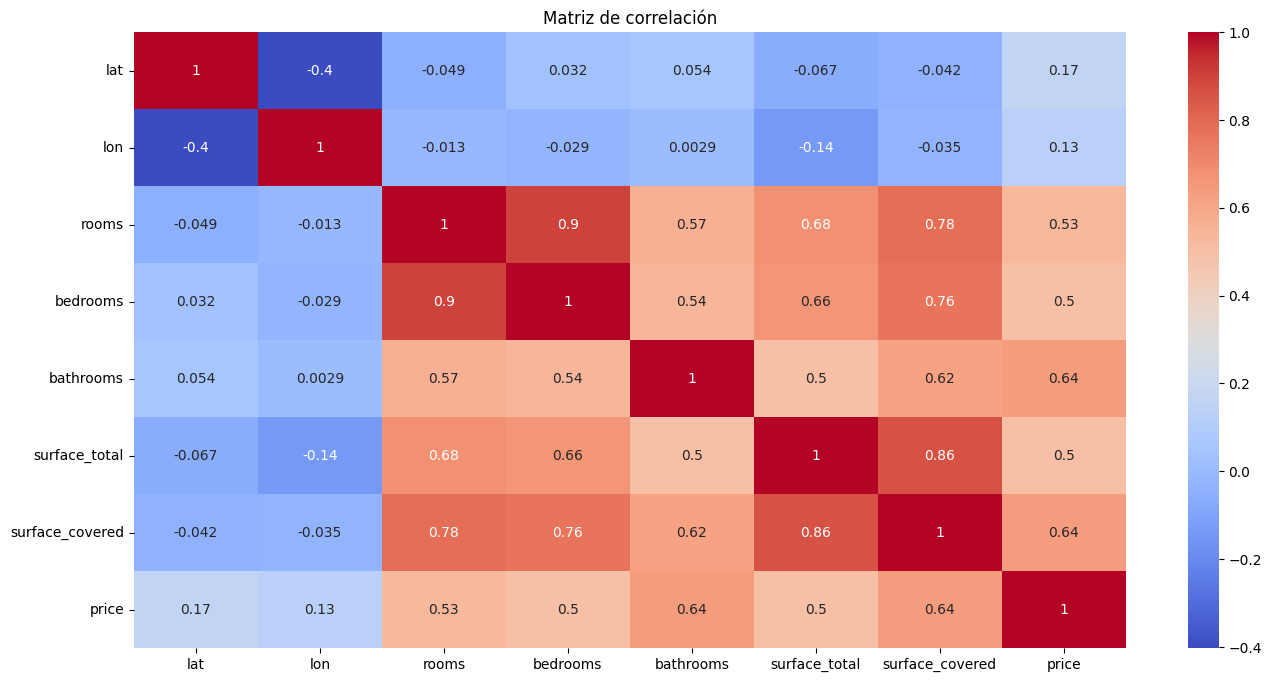

In [ ]:
## 4.4)

# Calcular correlaciones
corr = df.corr(numeric_only=True)
display(corr)

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

**Observaciones**: Notemos que, en la matriz de correlación, el precio de una propiedad se relaciona principalmente con la superficie total y cubierta, seguido de la cantidad de habitaciones y baños. También se puede notar la colinealidad entre la superficie cubierta y total.

# 5. Preparar los datos para modelos de ML

- 5.1) **Selección de variables**
  - Identificar variables numéricas y categóricas.
  - Identificar si hay columnas irrelevantes o redundantes.
  - Opcional: Aplicar ingeniería de features (ej: transformaciones o nuevas variables a partir de las presentes).
  - Seleccionar un conjunto prometedor de variables predictoras.

- 5.2) **Codificación de variables categóricas**
  - Usar `OneHotEncoder` o `OrdinalEncoder`  para variables categóricas (decidir cual).

- 5.3) **Imputación de valores faltantes**
  - Imputar valores faltantes si hay. Decidir qué estrategia de imputación usar para variables numéricas y para categóricas (sug: `SimpleImputer`).

- 5.4) **Separación de datos**
  - Crear los conjuntos de entrenamiento y testeo `X_train`, `X_test`, `y_train`, `y_test` (sug: `train_test_split`).

- 5.5) **Escalado de variables numéricas**
  - Normalizar las variables numéricas (sug: `StandardScaler`).


In [ ]:
## 5.1)

# Eliminamos todas las columnas de texto que no vamos a usar como categoricas
df = df.drop([col for col in df.select_dtypes('object').columns if col not in ('l2','l3','property_type')], axis=1)
# Tambien eliminamos 'l3', porque tiene muchas categorias y tiene una alta correlacion con 'l2'
df = df.drop('l3', axis=1)
# Eliminamos latitud y longitud (porque ya vamos a abarcar la ubicacion con la columna 'l2') y la columna de fecha, que tampoco nos sirve
df = df.drop(['lat','lon','start_date'], axis=1)

In [ ]:
## 5.1)
# Sacamos ademas a 'surface_total' que tiene alta multicolinealidad con 'surface_covered' (y 'surface_covered' tiene mas correlacion con el precio)
# Sacamos 'bedrooms' porque tiene alta multicolinealidad con rooms y bathrooms. Pero la sacamos mas adelante porque nos va a servir para imputar
df = df.drop('surface_total', axis=1)

In [ ]:
## 5.2)
# Usamos OneHotEncoder para codificar las variables categoricas relevantes
# Nos inclinamos por este metodo ya que consideramos que son categorias nominales sin orden alguno
# Ademas, codificamos antes de imputar cualquier valor faltante porque no hay faltantes en las columnas de string, categoricas, que vamos a codificar
from sklearn.preprocessing import OneHotEncoder
encoder_l2 = OneHotEncoder()
onehot_l2 = encoder_l2.fit_transform(df[['l2']])

# Abreviamos "property_type" como "pt"
encoder_pt = OneHotEncoder()
onehot_pt = encoder_pt.fit_transform(df[['property_type']])

In [ ]:
# Pasamos los valores del OneHot a un df para despues poder concatenarlo con el df original
df_onehot_l2 = pd.DataFrame(onehot_l2.toarray(), columns=encoder_l2.get_feature_names_out(["l2"]))
df_onehot_pt = pd.DataFrame(onehot_pt.toarray(), columns=encoder_pt.get_feature_names_out(["property_type"]))

In [ ]:
# Chequemos que las filas de todos coincidan
df_onehot_l2.shape[0] == df_onehot_pt.shape[0] == df.shape[0]

True

In [ ]:
# Reiniciamos el indice que quedo desbalanceado cuando sacamos outliers antes de concatenar con los dfs de OneHotEncoding
df = df.reset_index().drop('index',axis=1)

In [ ]:
# Concatenamos en horizontal (agregando columnas) y sacamos las variables categoricas
df = pd.concat([df, df_onehot_l2, df_onehot_pt], axis=1)

In [ ]:
# Sacamos las dos columnas que acabamos de codificar
df = df.drop(['l2','property_type'], axis=1)

In [ ]:
## 5.3)
# Vemos si hay faltantes
print(f'El df tiene {df.isna().sum().sum()} faltantes')

El df tiene 22298 faltantes


In [ ]:
## 5.3)
# En la celda de abajo vamos a imputar

# Antes de realizar la imputacion, verificamos aca que funcione para cierta columna
pd.concat([df['surface_covered'],df.groupby('rooms')['surface_covered'].transform(lambda x: x.fillna(x.median()))],axis=1).loc[df[df['surface_covered'].isna()==True].index]

# A izquierda esta el valor normal y a derecha el valor imputado

,surface_covered,surface_covered
376,NaN,101.0
601,NaN,44.0
602,NaN,44.0
606,NaN,44.0
607,NaN,44.0
...,...,...
121587,NaN,101.0
121592,NaN,101.0
121593,NaN,101.0
121602,NaN,101.0


In [ ]:
## 5.3)

# Aplicamos imputaciones en las columnas con faltantes
# Decidimos imputar con previo agrupamiento en una categoria que permita mas precision en la imputacion

# Imputamos 'surface_covered' de acuerdo a la mediana segun la cantidad de habitaciones
df["surface_covered"] = df.groupby('rooms')['surface_covered'].transform(lambda x: x.fillna(x.median()) if pd.isna(x.median())==False else df['surface_covered'].median())

# Imputamos 'bathrooms' de acuardo a la moda segun la cantidad de dormitorios
df["bathrooms"] = df.groupby('bedrooms')['bathrooms'].transform(lambda x: x.fillna(x.mode()[0])  if pd.isna(x.mode()[0])==False else df['bathrooms'].mode()[0])

In [ ]:
## 5.3)
# Sacamos 'bedrooms'
df = df.drop('bedrooms', axis=1)

In [ ]:
## 5.3)
# Quedo asi el df
df.head()

,rooms,bathrooms,surface_covered,price,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,7.0,2.0,140.0,153000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,58.0,159000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1.0,45.0,125000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1.0,50.0,295000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,1.0,56.0,150000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Retomando, por que nos quedamos con estas variables?

Todas las categoricas porque son codificaciones de variables que pensamos que pueden ser valiosas, sobretodo las de 'l2' que son pocas y pueden servir para categorizar muy facilmente.

En cuanto a las numericas. Son las que mas correlacion tienen con la variable que queremos predecir, price. Ademas descartamos bedrooms y surface_total porque rooms y surface_covered tenian mayor validez logica en como se relacionaban con el precio y, respectivamente, habia que descartar la otra si o si por la multicolinealidad que se podia generar.

Obviamente que entre las 3 que dejamos hay cierto grado de correlacion, pero al menos sacamos otras. Lo ideal seria obtener variables que se correlacionen con el precio y no lo hagan entre ellas, pero no es este caso. Asi que nos adecuamos a lo que tenemos. Tambien valoramos mucho rooms y bathrooms porque tenian muy pocos outliers severos, y rooms pese a su alta correlacion con surface_covered, queriamos dejarla porque no hubo que imputarle ni un solo valor.

Es por esa combinacion de motivos que nos inclinamos por estas features.

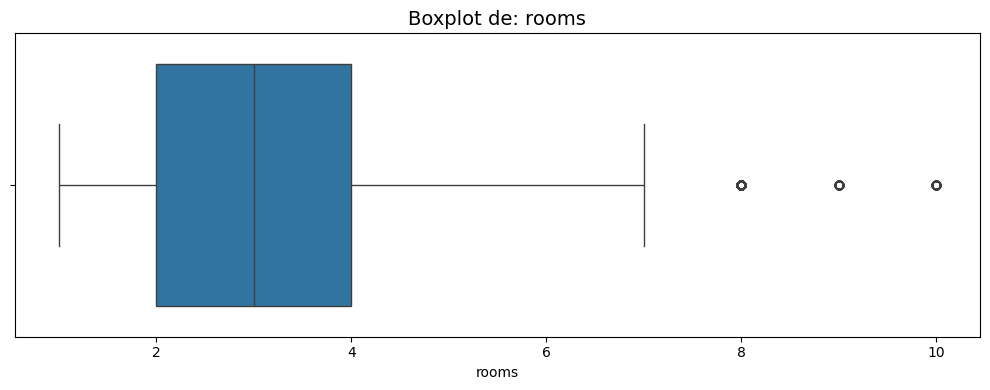

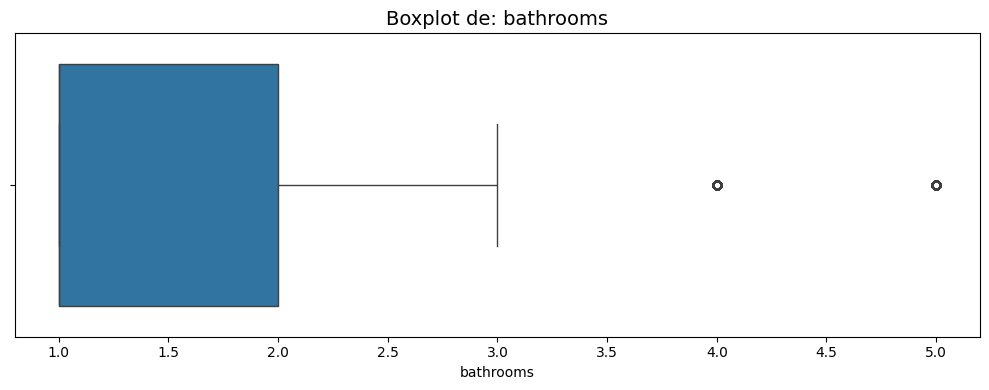

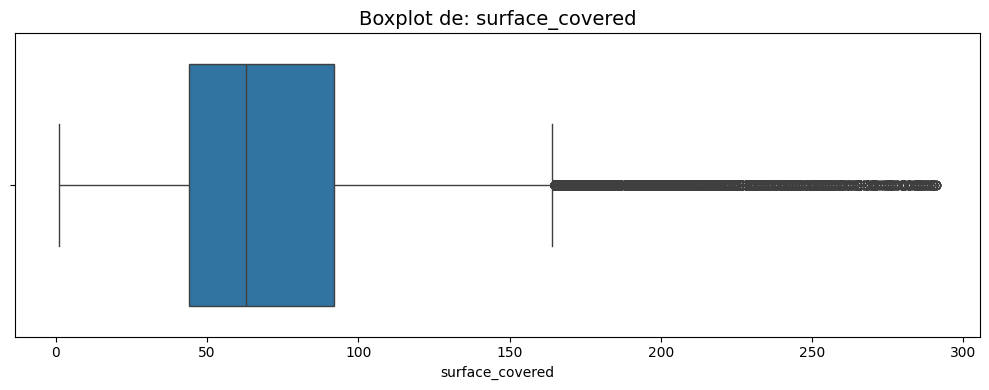

In [ ]:
# Vemos la distribucion para las variables ahora que no tienen faltantes ni outliers severos (puede ser que ahora surgan otros, pero no importa)
cols_numericas = ['rooms', 'bathrooms','surface_covered']

for col in cols_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de: {col}", fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    # Ahora si estos boxplots tienen una forma mas cercana a lo que estamos acostumbrados

In [ ]:
## 5.4)
y = df['price']
x_df = df.drop('price',axis=1)
lista = []
for col in x_df.columns:
  lista.append(x_df[col])
X = pd.DataFrame(lista).T

In [ ]:
# Estas son las columnas que vamos a usar para el analisis
X.head(1)

,rooms,bathrooms,surface_covered,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,7.0,2.0,140.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## 5.4)
# Las columnas que tenemos son:
X.columns, len(X.columns)

(Index(['rooms', 'bathrooms', 'surface_covered', 'l2_Bs.As. G.B.A. Zona Norte',
        'l2_Bs.As. G.B.A. Zona Oeste', 'l2_Bs.As. G.B.A. Zona Sur',
        'l2_Capital Federal', 'property_type_Casa',
        'property_type_Casa de campo', 'property_type_Cochera',
        'property_type_Departamento', 'property_type_Depósito',
        'property_type_Local comercial', 'property_type_Lote',
        'property_type_Oficina', 'property_type_Otro', 'property_type_PH'],
       dtype='object'),
 17)

In [ ]:
## 5.4)
# Para la regresion lineal multiple de grado 1 vamos a usar las 17 variables
# Para probar la polinomica y encontrar el grado que minimice el error, vamos a usar rooms, bathrooms, surface_covered y las 4 variables codificadas que representan a 'l2'
# Lo mismo para Ridge

# Para Lasso, nos vamos a limitar a usar solo las 3 que son de naturaleza numerica (ya que las 4 que codifican a 'l2' incrementan de manera considerable el tiempo de
# respuesta del modelo y no dejan de ser variables binarias)

In [ ]:
## 5.4)
# Obviamente el conjunto y solo tiene una columna, que es la que vamos a tratar de predecir
y.head(1)

,price
0,153000.0


In [ ]:
## 5.4)
# Vemos que efectivamente X e y tienen la misma cantidad de filas
X.shape, y.shape

((122438, 17), (122438,))

In [ ]:
## 5.4)
# Separamos en conjunto de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## 5.5)
# Estandarizamos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# X_train tiene esta forma:
X_train[0]

array([ 0.09894596, -0.64917075, -0.23746253, -0.38161163, -0.31213748,
       -0.27470642,  0.63299795, -0.3153765 , -0.01565513, -0.04431742,
        0.52398553, -0.03659519, -0.04314568, -0.0632261 , -0.06995472,
       -0.0350231 , -0.35061677])

# 6. Entrenamiento


- 6.1) **Probar al menos 4 modelos distintos**
  - Ej: Regresión lineal simple (`LinearRegression`), Ridge Regression (`Ridge`), Lasso Regression (`Lasso`).
  - Probar modelos con regresión polinomial usando `PolynomialFeatures`.
  - Ir siempre de lo más simple a lo más complejo.

- 6.2) **Evaluar y comparar**
  - Evaluar los modelos **solo** en el conjunto de entrenamiento mediante validación cruzada usando `cross_val_score`.

In [ ]:
## 6.1) y 6.2)
# Hicimos todo junto porque vamos probando un modelo, testeandolo con los datos de entrenamiento y pasando a un siguiente modelo

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# Modelo 1:
### Modelo regresión lineal multiple
# Lo probamos con las 17 variables
#
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [ ]:
print('Regresion Lineal Multiple:')
print('\t'*2,"RMSE por fold:", -np.round(scores_lr,3))
print('\t'*2, "RMSE promedio:", -np.mean(scores_lr))
print('\t'*2, "Desvío estándar del RMSE:", np.std(-scores_lr))

Regresion Lineal Multiple:
		 RMSE por fold: [77473.033 79008.417 76692.671 77785.053 79516.846]
		 RMSE promedio: 78095.2040297042
		 Desvío estándar del RMSE: 1030.088654970318


Mínimo de error en train con grado 5


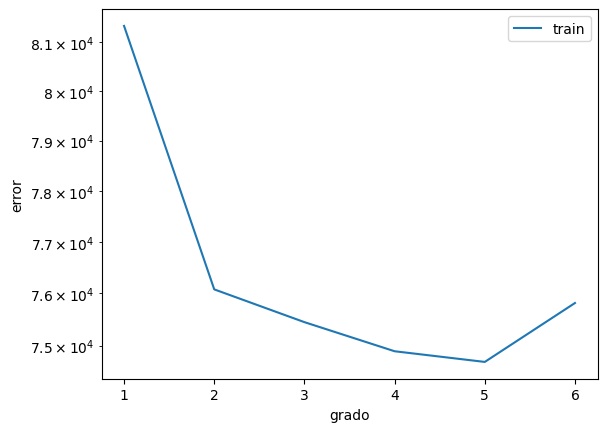

In [ ]:
# Modelo 2:
### Modelo Regresión Polinomial
#

# Probamos distintos grados polinomiales
degrees = np.arange(1,7)

# Redefinimos el conjunto de entrenamiento y testeo
# Vamos a sacar a todas las variables categoricas que codifican el 'property_type', porque sino escalandolo a grados mayores, se ralentiza el funcionamiento
# y creemos que tampoco son las variables principales en la determinacion del precio de la propiedad
X_train_pol = X_train[:, :7]      # Nos quedamos solo con rooms, bathrooms, surface_covered y las 4 binarias que codifican 'l2'
X_test_pol = X_test[:, :7]
train_errors_pol = []

for d in degrees:
    pipeline_poly = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("scaler", StandardScaler()),
        ("regressor", LinearRegression())
    ])

    # Evaluación SOLO en el conjunto de entrenamiento con CV
    scores_poly = cross_val_score(
        pipeline_poly, X_train_pol, y_train,
        cv=5,
        scoring="neg_root_mean_squared_error"
    )

    train_errors_pol.append(-np.mean(scores_poly))

plt.plot(degrees, train_errors_pol, label='train')
plt.xticks(degrees)
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en train con grado',degrees[np.argmin(train_errors_pol)])

In [ ]:
# Sabiendo el grado optimo para el polinomio, vemos cual es el valor de RMSE de esta regresion
# Recordamos: grado 5 y 7 features

d = degrees[np.argmin(train_errors_pol)]
pipeline_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=d, include_bias=False)),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

scores_poly = cross_val_score(
    pipeline_poly, X_train_pol, y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

In [ ]:
print(f"Polinomio de grado d={d}")
print("\t\tRMSE por fold:", -np.round(scores_poly, 3))
print("\t\tRMSE promedio:", -np.mean(scores_poly))
print("\t\tDesvío estándar del RMSE:", np.std(-scores_poly))

Polinomio de grado d=5
		RMSE por fold: [74343.632 75613.18  73769.054 73684.73  76046.779]
		RMSE promedio: 74691.47515390543
		Desvío estándar del RMSE: 966.6209573194886


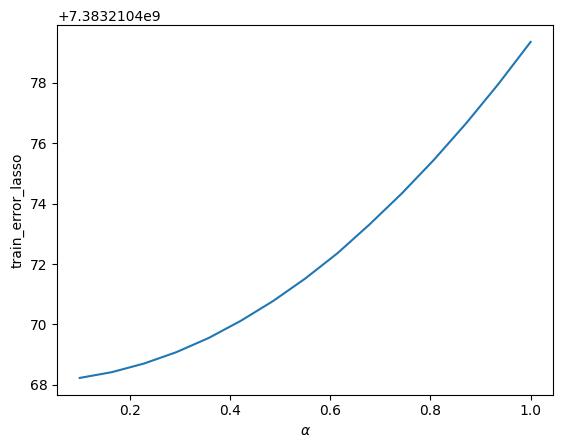

In [ ]:
# Modelo 3:
### Modelo regresion lineal con regularización Lasso
#

# Vemos como varia el error cuadratico medio a medida que cambia el alpha para una regresion Lasso
# manteniendo constante el grado del polinomio de regresion, para tener una idea de que intervalo de alphas es mejor

# Nos quedamos solo con los primeros 3 terminos que son los que explican mas la variabilidad, el resto eran codificaciones de variables categoricas
# Ademas, cuando corramos la regresion con grados superiores, la diferencia entre 3 y 7 features es muy grande en terminos de tiempo de respuesta

X_train_lasso = X_train[:, :3]
X_test_lasso = X_test[:, :3]

alphas = np.linspace(0.1, 1, 15)
train_errors = []
for alpha in alphas:
  reg_lasso = Lasso(alpha=alpha)
  reg_lasso.fit(X_train_lasso, y_train)
  train_error = mean_squared_error(y_train, reg_lasso.predict(X_train_lasso))
  train_errors.append(train_error)

plt.plot(alphas,train_errors,'-')
plt.xlabel(r'$\alpha$')
plt.ylabel('train_error_lasso');

In [ ]:
# Ahora que vamos a correr el modelo con un alpha logico viendo el grafico de arriba, elevevamos el grado del polinomio, pero tampoco
# al grado optimo visto para la regresion polinomica. Por dos motivos: primero, grados superiores hacen que la regresion Lasso tarde demasiado tiempo, y
# en segundo lugar, estamos viendo en que medida la regularizacion es capaz de mejorar el RMSE

# Con 3 features y grado 4, hay 34 parametros. Con 3 features y grado 5, hay 55 parametros. Esa diferencia en Lasso se hace muy evidente por la manera en que busca la solucion

d_lasso = 4
alpha_lasso = 0.1
pipeline_lasso_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=d_lasso, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=alpha_lasso, max_iter=10000))
])
scores_lasso = cross_val_score(pipeline_lasso_poly, X_train_lasso, y_train, cv=5, scoring="neg_root_mean_squared_error")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.629e+13, tolerance: 1.149e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+14, tolerance: 1.143e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+14, tolerance: 1.149e

In [ ]:
print(f'Lasso (alpha: {alpha_lasso}; grado d={d_lasso}):')
print('\t'*2,"RMSE por fold:", -np.round(scores_lasso,3))
print('\t'*2, "RMSE promedio:", -np.mean(scores_lasso))
print('\t'*2, "Desvío estándar del RMSE:", np.std(-scores_lasso))

Lasso (alpha: 0.1; grado d=4):
		 RMSE por fold: [81420.664 83236.43  81673.599 81182.189 83267.905]
		 RMSE promedio: 82156.15723002386
		 Desvío estándar del RMSE: 908.33893654294


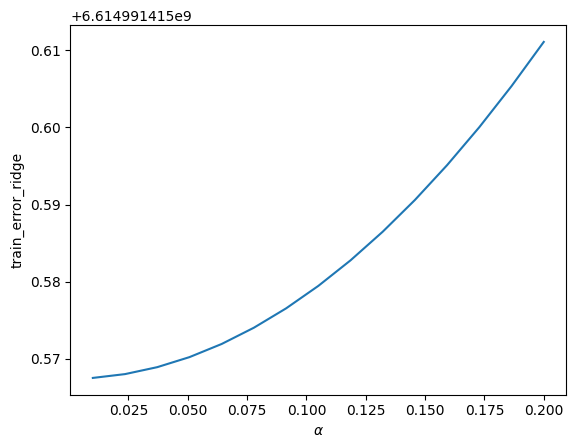

In [ ]:
# Modelo 4:
### Modelo lineal con regularización Ridge
#

# Vemos como varia el error cuadratico medio a medida que cambia el alpha para una regresion Ridge
# (manteniendo constante el grado del polinomio de regresion)

# Como la regresion Ridge es mucho mas potente computacionalmente, la entrenamos con 7 variables como a la polinomica

alphas = np.linspace(0.01,0.2,15)   # Suponiendo que puede pasar como en Lasso, directamente evaluamos para alphas mas chicos
train_errors = []
for alpha in alphas:
  reg_ridge = Ridge(alpha=alpha)
  reg_ridge.fit(X_train_pol, y_train)
  train_error = mean_squared_error(y_train, reg_ridge.predict(X_train_pol))
  train_errors.append(train_error)

plt.plot(alphas,train_errors,'-')
plt.xlabel(r'$\alpha$')
plt.ylabel('train_error_ridge');

In [ ]:
# Ahora buscamos el RMSE de la Ridge con la mismas variables que la polinomica
# Esto lo podemos hacer con Ridge porque tiene un tiempo de ejecucion significativamente menor a Lasso
# Empezamos probando con grado 4 para ver cuanto es la diferencia con Lasso del mismo grado (aunque hay que ser conscientes que hay mas features en Ridge)

d1 = 4
alpha_ridge = 0.01
pipeline_ridge_poly_d1 = Pipeline([
    ("poly", PolynomialFeatures(degree=d1, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=alpha_ridge, max_iter=10000))
])
scores_ridge_d1 = cross_val_score(pipeline_ridge_poly_d1, X_train_pol, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [ ]:
print(f'Ridge (alpha: {alpha_ridge}; grado d={d1}):')
print('\t'*2,"RMSE por fold:", -np.round(scores_ridge_d1,3))
print('\t'*2, "RMSE promedio:", -np.mean(scores_ridge_d1))
print('\t'*2, "Desvío estándar del RMSE:", np.std(-scores_ridge_d1))

Ridge (alpha: 0.01; grado d=4):
		 RMSE por fold: [74459.455 75640.918 73925.65  74013.255 76430.225]
		 RMSE promedio: 74893.9008300133
		 Desvío estándar del RMSE: 981.8468089509264


In [ ]:
# Modelo 4 bis:
### Modelo lineal con regularización Ridge
#

# Ahora buscamos el RMSE de la Ridge con la mismas variables y grado que la polinomica, pero con el grado optimo para la polinomica (grado 5)
# Vamos a tener 791 parametros en este modelo. Ridge lo maneja muy bien eso, pero a Lasso le costaria mucho. Veamos como dan los resultados

pipeline_ridge_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=d, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=alpha_ridge, max_iter=10000))
])
scores_ridge = cross_val_score(pipeline_ridge_poly, X_train_pol, y_train, cv=5, scoring="neg_root_mean_squared_error")

In [ ]:
print(f'Ridge (alpha: {alpha_ridge}; grado d={d}):')
print('\t'*2,"RMSE por fold:", -np.round(scores_ridge,3))
print('\t'*2, "RMSE promedio:", -np.mean(scores_ridge))
print('\t'*2, "Desvío estándar del RMSE:", np.std(-scores_ridge))

Ridge (alpha: 0.01; grado d=5):
		 RMSE por fold: [74343.508 75612.581 73768.658 73684.688 76046.412]
		 RMSE promedio: 74691.16952694685
		 Desvío estándar del RMSE: 966.4970553981352


In [ ]:
print('En sintesis:')
print('Regresion Lineal Multiple:')
print('\t'*2, "RMSE promedio:", -np.mean(scores_lr))
print(f"Polinomio de grado d={d}")
print("\t"*2, "RMSE promedio:", -np.mean(scores_poly))
print(f'Lasso (alpha: {alpha_lasso}; grado d={d_lasso}):')
print('\t'*2, "RMSE promedio:", -np.mean(scores_lasso))
print(f'Ridge (alpha: {alpha_ridge}; grado d={d1}):')
print('\t'*2, "RMSE promedio:", -np.mean(scores_ridge_d1))
print(f'Ridge (alpha: {alpha_ridge}; grado d={d}):')
print('\t'*2, "RMSE promedio:", -np.mean(scores_ridge))

En sintesis:
Regresion Lineal Multiple:
		 RMSE promedio: 78095.2040297042
Polinomio de grado d=5
		 RMSE promedio: 74691.47515390543
Lasso (alpha: 0.1; grado d=4):
		 RMSE promedio: 82156.15723002386
Ridge (alpha: 0.01; grado d=4):
		 RMSE promedio: 74893.9008300133
Ridge (alpha: 0.01; grado d=5):
		 RMSE promedio: 74691.16952694685


A modo de conclusion inicial, Ridge es la que mejor performa, pero no muy alejado de la polinomica comun. Para tomar dimension del rendimiento de Lasso, tambien se hizo Ridge con un grado menor al optimo incial de d=5, y vemos que Lasso no esta respondiendo como Ridge (aunque debamos considerar que hay una diferencia en la cantidad de features y por ende de parametros).

# 7. Ajuste fino



- 7.1) **Buscar los mejores hiperparámetros**
  - Para los modelos con hiperparámetros (como `alpha`  y/o `degree`), hacer un ajuste fino por validación cruzada (sug: `GridSearch` o `RandomizedSearch`).
  - Elegir el modelo final basandose en las métricas de validación cruzada. Hacer un gráfico de barras comparando el RMSE de validación de los modelos comparados.
  - Especificar cuál es el modelo elegido, sus hiperparámetros y variables de entrada (*features*).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


# El pipeline base ya fue definido antes

param_dist = {
    "ridge__alpha": loguniform(1e-3, 10),  # distribución log-uniforme
    "poly__degree": np.arange(1,7)  # tambien podría agregar distintos valores de "degree" a la búsqueda
    }

# Randomized Search en lugar de Grid Search
random_search = RandomizedSearchCV(
    pipeline_ridge_poly,
    param_distributions=param_dist,
    n_iter=20,     # número de combinaciones a probar --> bajo
    cv=5,          # menos folds para que corra más rápido
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

# Entrenamos
random_search.fit(X_train_pol, y_train)

# Resultados
print("Mejor combinación de hiperparámetros:", random_search.best_params_)
print("Mejor RMSE (CV):", -random_search.best_score_)


Mejor combinación de hiperparámetros: {'poly__degree': np.int64(5), 'ridge__alpha': np.float64(0.06338653441536259)}
Mejor RMSE (CV): 74689.58717382212


In [ ]:
# Vemos el modelo que mejor funciono

results = pd.DataFrame(random_search.cv_results_)
results['RMSE'] = -results['mean_test_score']
results.sort_values(by='RMSE', ascending=True, inplace=True)
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,RMSE
19,8.023454,1.362588,0.54686,0.212284,5,0.063387,"{'poly__degree': 5, 'ridge__alpha': 0.06338653...",-74342.871391,-75609.421412,-73766.619767,-73684.491479,-76044.531821,-74689.587174,965.84347,1,74689.587174


In [ ]:
# Hacemos la comparacion con todos los modelos que probamos hasta el momento
# Como era esperado, el que encontro el Random Search es el mejor

print('Regresion Lineal Multiple:')
print('\t'*2, "RMSE promedio:", -np.mean(scores_lr))
print(f"Polinomio de grado d={d}")
print("\t"*2, "RMSE promedio:", -np.mean(scores_poly))
print(f'Lasso (alpha: {alpha_lasso}; grado d={d_lasso}):')
print('\t'*2, "RMSE promedio:", -np.mean(scores_lasso))
print(f'Ridge (alpha: {alpha_ridge}; grado d={d1}):')
print('\t'*2, "RMSE promedio:", -np.mean(scores_ridge_d1))
print(f'Ridge (alpha: {alpha_ridge}; grado d={d}):')
print('\t'*2, "RMSE promedio:", -np.mean(scores_ridge))
print(f'Ridge con Random Search (alpha: {random_search.best_params_['ridge__alpha']}; grado d={random_search.best_params_['poly__degree']})')
print('\t'*2, "RMSE promedio:", -random_search.best_score_)

Regresion Lineal Multiple:
		 RMSE promedio: 78095.2040297042
Polinomio de grado d=5
		 RMSE promedio: 74691.47515390543
Lasso (alpha: 0.1; grado d=4):
		 RMSE promedio: 82156.15723002386
Ridge (alpha: 0.01; grado d=4):
		 RMSE promedio: 74893.9008300133
Ridge (alpha: 0.01; grado d=5):
		 RMSE promedio: 74691.16952694685
Ridge con Random Search (alpha: 0.06338653441536259; grado d=5)
		 RMSE promedio: 74689.58717382212


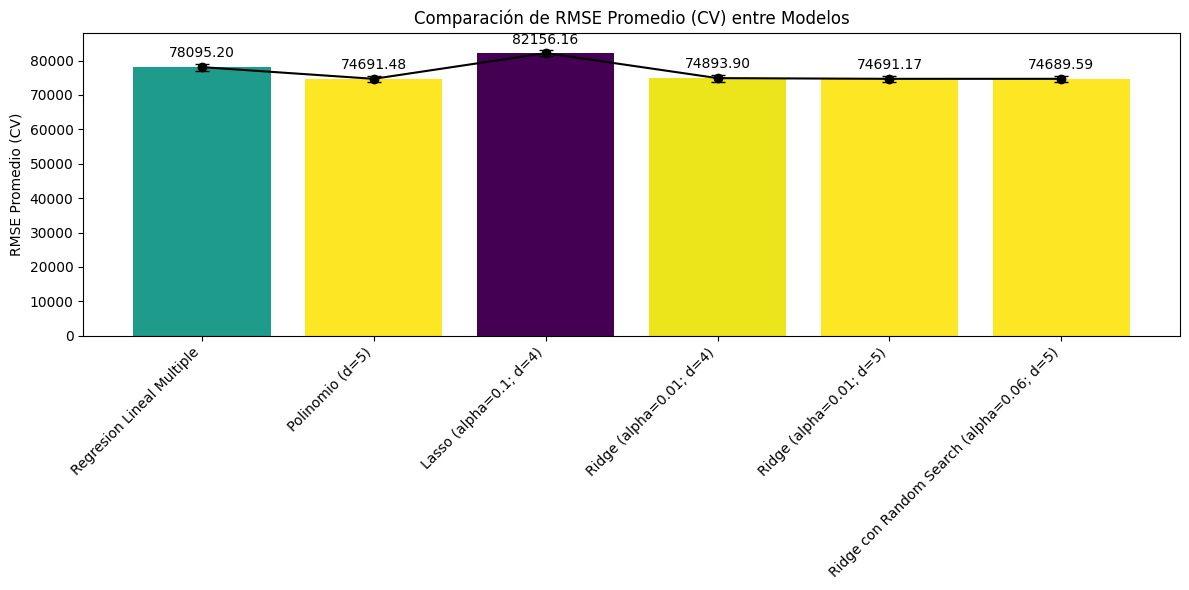

In [ ]:
# Grafico de barras con el RMSE de cada una de estas opciones y su barra de dispersion

model_names = [
    'Regresion Lineal Multiple',
    f'Polinomio (d={d})',
    f'Lasso (alpha={alpha_lasso}; d={d_lasso})',
    f'Ridge (alpha={alpha_ridge}; d={d1})',
    f'Ridge (alpha={alpha_ridge}; d={d})',
    f'Ridge con Random Search (alpha={random_search.best_params_["ridge__alpha"]:.2f}; d={random_search.best_params_["poly__degree"]})'
]

rmse_values = [
    -np.mean(scores_lr),
    -np.mean(scores_poly),
    -np.mean(scores_lasso),
    -np.mean(scores_ridge_d1),
    -np.mean(scores_ridge),
    -random_search.best_score_
]

# Mostramos ademas las barras de dispersion del desvio standard para cada barra
rmse_std_dev = [
    np.std(-scores_lr),
    np.std(-scores_poly),
    np.std(-scores_lasso),
    np.std(-scores_ridge_d1),
    np.std(-scores_ridge),
    random_search.cv_results_['std_test_score'][random_search.best_index_]
]

plt.figure(figsize=(12, 6))

# Normalizamos los valores RMSE por color. RMSE mas bajo, color mas clarito
norm = plt.Normalize(min(rmse_values), max(rmse_values))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])
colors = sm.to_rgba(rmse_values)

x_pos = np.arange(len(model_names))

plt.bar(x_pos, rmse_values, yerr=rmse_std_dev, capsize=5, color=colors)

plt.ylabel('RMSE Promedio (CV)')
plt.title('Comparación de RMSE Promedio (CV) entre Modelos')
plt.xticks(x_pos, model_names, rotation=45, ha='right')

# Linea que conecta el top de las barras
plt.plot(x_pos, rmse_values, marker='o', linestyle='-', color='black')

# Etiquetas
for i, v in enumerate(rmse_values):
    plt.text(x_pos[i], v + rmse_std_dev[i] + 1000, f"{v:.2f}", ha='center', va='bottom')


# Agrego más espacio arriba
plt.ylim(0, max([rmse + std for rmse, std in zip(rmse_values, rmse_std_dev)]) + 5000)


plt.tight_layout()
plt.show()

Aunque no se vea tanto por la escala, por los valores vemos que la regresion de los hiperparametros que devolvio el Random Search es la mejor. Decidimos no recortar el eje y porque creemos que se trata de una mala practica de la visualizacion de datos. Si los modelos dieron errores cuadraticos medios tan similares a pesar del grado o del aplicar regularizacion o no, creemos que es algo que debemos mostrar en el grafico, y quitar eso seria intentar transimitir una diferencia en los resultados que no fue tal.

El modelo elegido es la regresion lineal polinomica con regularizacion Ridge de hiperparametros grado igual a 5 y alpha aproximadamente igual 0,06. Las features elegidad para el modelo final son 7: 'rooms', 'bathrooms', 'surface_covered', 'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste', 'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal'. Estas 4 ultimas son codificaciones binarias de la variable string 'l2'.

# 8. Testeo

- 8.1) **Finalmente, evaluar el modelo final en el conjunto de testeo**
  - Calcular el RMSE del modelo final (en test) y visualizar predicciones vs valores reales en un scatterplot.
  - ¿Cuáles fueron las features más importantes?, ¿Pueden hacer alguna interpretación?

RMSE en test (Ridge polinómico d=5, alpha=0.06): 74241.14


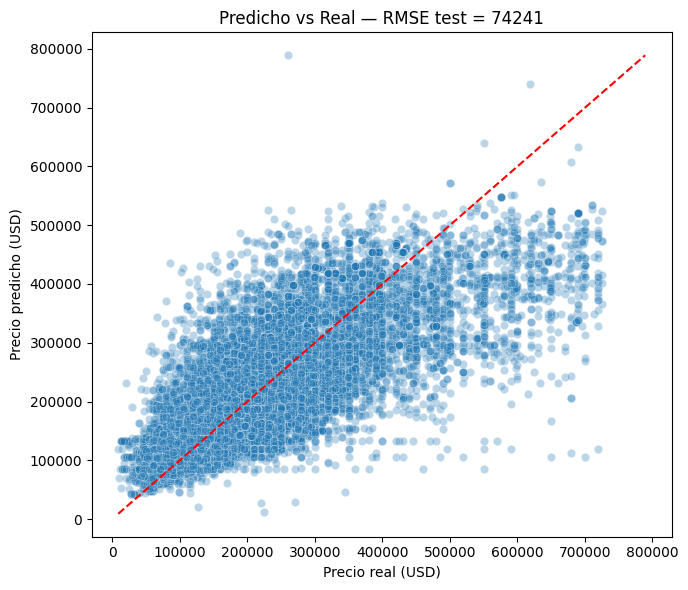

In [ ]:
# ## 8. Testeo final del modelo elegido: regresion con regularizacion Ridge, polinomial d=5, alpha≈0.06, 7 features

# Pipeline del modelo elegido

best_model = Pipeline([
    ("poly", PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=0.06))
])

# Entrenamos con TODO el train
best_model.fit(X_train_pol, y_train)

# Predicciones en test
y_pred = best_model.predict(X_test_pol)

# Calcular RMSE
mse_test = mean_squared_error(y_test, y_pred)  # MSE
rmse_test = np.sqrt(mse_test)                  # RMSE
print(f"RMSE en test (Ridge polinómico d=5, alpha=0.06): {rmse_test:.2f}")

# Gráfico Predicho vs Real
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "r--")  # línea ideal y=x
plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.title(f"Predicho vs Real — RMSE test = {rmse_test:.0f}")
plt.tight_layout()
plt.show()

In [ ]:
# Podemos ademas ver el R² ajustado del modelo
from sklearn.metrics import r2_score

def r2_ajustado(y_true, y_pred, n_features):
    """Calcula R² ajustado"""
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

# Número real de features creados por PolynomialFeatures (sin bias)
poly = PolynomialFeatures(degree=5, include_bias=False)
n_features_poly = poly.fit_transform(X_train_pol).shape[1]

# R² ajustado en test
r2 = r2_score(y_test, y_pred)
r2_adj = r2_ajustado(y_test, y_pred, n_features_poly)

print("R² (test):", r2)
print("R² ajustado (test):", r2_adj)
print(f"Esto quiere decir que el modelo explica el {r2_adj:.2%} de la variabilidad en los datos de testeo")

R² (test): 0.6200488900804861
R² ajustado (test): 0.6073656807647225
Esto quiere decir que el modelo explica el 60.74% de la variabilidad en los datos de testeo


<Figure size 1000x600 with 0 Axes>

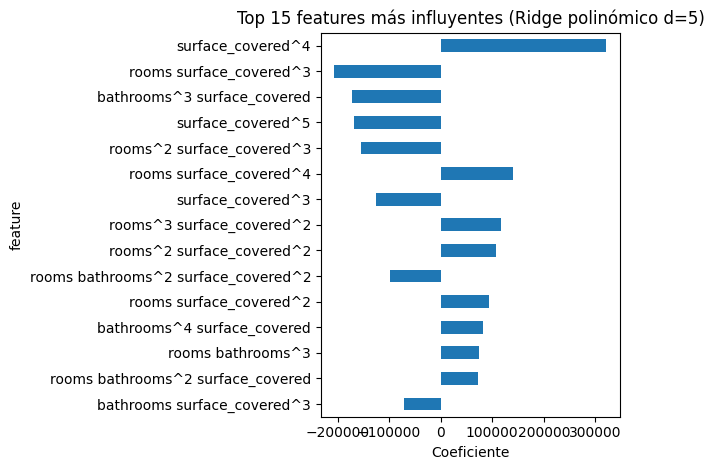

In [ ]:
## Y para mostrar cuáles fueron los features más importantes:

orig_names = x_df.columns[:7]  # nombres originales DE LAS 7 COLUMNAS del PolynomialFeatures
poly_step = best_model.named_steps["poly"]
ridge_step = best_model.named_steps["ridge"]

expanded_names = poly_step.get_feature_names_out(orig_names)

coefs = ridge_step.coef_

#Armar ranking con coeficientes que ya corresponden a expanded_names
coef_df = pd.DataFrame({
    "feature": expanded_names,
    "coef": coefs,
    "abscoef": np.abs(coefs)
}).sort_values("abscoef", ascending=False)

# Mostrar top-15
# print(coef_df.head(15)[["feature", "coef"]])

plt.figure(figsize=(10,6))
coef_df.head(15).sort_values("abscoef").plot(
    x="feature", y="coef", kind="barh", legend=False
)
plt.title("Top 15 features más influyentes (Ridge polinómico d=5)")
plt.xlabel("Coeficiente")
plt.tight_layout()
plt.show()

La variabilidad explicada roza en el limite de lo aceptable. Para que el modelo pueda categorizarse como bueno, parecen faltar variables. Pero yendo al RMSE, es una buena noticia que ese valor sea parecido (es incluso menor en verdad) al de entrenamiento, significando que el modelo ha encontrado los patrones generales y es bueno para predecir. Hay margen de mejora, pero los resultados son un buen comienzo.